# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/machinelearning-az.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

#Google colab tools

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

#Instalar dependendias

In [ ]:
!pip install sklearn

# SVR

# Cómo importar las librerías


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [99]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [ ]:
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
"""

# Escalado de variables

In [92]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scalar = sc_X.fit_transform(X)
y_scalar = sc_y.fit_transform(y.reshape(-1,1))
y_scalar

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Ajustar la regresión con el dataset

In [93]:
from sklearn.svm import SVR

In [94]:
regression = SVR(kernel = "rbf")
regression.fit(X_scalar, y_scalar)

c:\Users\USUARIO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predicción de nuestros modelos con SVR


# Visualización de los resultados del SVR

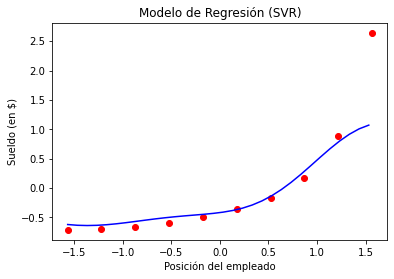

In [95]:
X_grid = np.arange(min(X_scalar), max(X_scalar), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_scalar, y_scalar, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

In [100]:
X1 = sc_X.inverse_transform(X_scalar)
y1 = sc_y.inverse_transform(y_scalar)
print(y1)

[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


In [97]:
x_grid = np.arange(min(X1),max(X1),0.1)
x_grid = x_grid.reshape(-1,1)
x_grid
a = regression.predict(sc_X.transform(x_grid))
a = a.reshape(-1,1)
yx = sc_y.inverse_transform(a)

rounded_int_matrix = [[int(round(value)) for value in row] for row in yx]

print(rounded_int_matrix)


[[73474], [71922], [70671], [69719], [69061], [68691], [68599], [68777], [69210], [69885], [70787], [71899], [73202], [74679], [76310], [78074], [79953], [81926], [83973], [86075], [88213], [90369], [92526], [94668], [96781], [98852], [100869], [102825], [104710], [106521], [108255], [109911], [111491], [113001], [114448], [115842], [117196], [118526], [119851], [121193], [122575], [124024], [125569], [127242], [129076], [131107], [133370], [135903], [138744], [141931], [145503], [149497], [153948], [158890], [164354], [170370], [176961], [184148], [191945], [200365], [209410], [219080], [229367], [240254], [251722], [263741], [276275], [289281], [302710], [316506], [330607], [344945], [359448], [374040], [388639], [403163], [417527], [431645], [445431], [458801], [471672], [483963], [495600], [506509], [516625], [525888], [534245], [541651], [548067], [553464]]


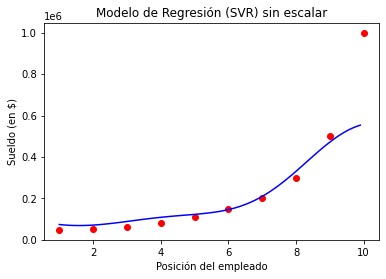

In [101]:
x_grid = np.arange(min(X1),max(X1),0.1)
x_grid = x_grid.reshape(-1,1)
plt.scatter(X1,y1,color="red")
a = regression.predict(sc_X.transform(x_grid))
a = a.reshape(-1,1)
yx = sc_y.inverse_transform(a)
plt.plot(x_grid, yx, color = "blue")
plt.title("Modelo de Regresión (SVR) sin escalar")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()